# Data EDA

Now, imagine that I am working for a gaming news platform.  
My platform is rolling out a new service, pushing interesting contents from a bank of mixed up posts to user, based on ther user's preference.  
Before I push the post to the Nintendo/ PlayStation fans, I will first need to identify where these posts come from.  
Somehow the contents the game news platform generates is very similar to reddit, so I decided to gather some reddit posts and make a classifier which can identify is the post is from `r/nintendo` or `r/playstation`.  

---

This notebook is for EDA and preliminary model on `r/nintendo` and `r/playstation` data collected from reddit.  
There are about 1900 posts from each subreddit.  

Contents:
1. [EDA](#EDA)
2. [Prelim model](#Prelim-model)
3. [Further EDA](#Further-EDA)

## EDA

In this section, data cleaning, EDA etc will be performed.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Load data
ns_df = pd.read_csv('../data/nintendo_posts.csv')
display(ns_df.head())
display(ns_df.shape)

,id,title,post_content,user
0,119r7rg,THROWDOWN THURSDAY: LEAKS CONFIRM LINK IS IN T...,"WELCOME TO THROWDOWN THURSDAY, TURN YOUR CAPS ...",1338h4x
1,11c6ol7,"smile sunday - happy 30th anniversary, star fox!",turn your caps lock off and rave about whateve...,tale-wind
2,11cai3l,Never played a Pokémon game- where do I start?,I’ve been a gamer since early Gameboy days but...,Focusboy50
3,11bipdi,Universal Brazil posted a video of a Mario mov...,NaN,Nas160
4,11bkknf,MyNintendo offering eight exclusive reversible...,NaN,blubberpuppers


(1916, 4)

In [3]:
ps_df = pd.read_csv('../data/playstation_posts.csv')
display(ps_df.head())
display(ps_df.shape)

,id,title,post_content,user
0,11c5v5o,Recommendation Central,Looking for recommendations on what game to pl...,AutoModerator
1,11cgh82,My wife just got into a new crafting project a...,NaN,stanrandom
2,11bt09c,"When just saying ""I designs muscles and beards...",NaN,Mistah-S
3,11bl8dm,Just spotted a mouse cursor in one of forbidde...,NaN,Add1215
4,11bppbw,God of War Ragnarök PS5 Voucher/Code,NaN,eugenekk


(1988, 4)

There are 1916 posts from `r/nintendo` and 1988 posts from `r/playstation`.  
Let data from `r/nintendo` be labelled as 1, and `r/playstation` be labelled as 0.

In [4]:
# label the datas
ns_df['label'] = int(ns_df.shape[0])*[1]
ps_df['label'] = int(ps_df.shape[0])*[0]

# Concate the dataframes
df = pd.concat([ns_df, ps_df], axis=False, sort=False)
df.reset_index(drop=True, inplace=True)
df.head()

,id,title,post_content,user,label
0,119r7rg,THROWDOWN THURSDAY: LEAKS CONFIRM LINK IS IN T...,"WELCOME TO THROWDOWN THURSDAY, TURN YOUR CAPS ...",1338h4x,1
1,11c6ol7,"smile sunday - happy 30th anniversary, star fox!",turn your caps lock off and rave about whateve...,tale-wind,1
2,11cai3l,Never played a Pokémon game- where do I start?,I’ve been a gamer since early Gameboy days but...,Focusboy50,1
3,11bipdi,Universal Brazil posted a video of a Mario mov...,NaN,Nas160,1
4,11bkknf,MyNintendo offering eight exclusive reversible...,NaN,blubberpuppers,1


In [5]:
(df.isna().sum()/df.shape[0])*100

id               0.000000
title            0.000000
post_content    66.086066
user             4.585041
label            0.000000
dtype: float64

In [6]:
df.isna().sum()

id                 0
title              0
post_content    2580
user             179
label              0
dtype: int64

66.08% of the posts, or 2580, of the posts collected are not word posts.   
They are either video or picture posts.  
4.59% or 179 users doesn't have a user name.  
Maybe they are banned?  
It doesn't really matter now, as user name will not be used.

In [9]:
type(df['post_content'][8])

float

A key point that I should really remeber is that in pandas, `NaN` is represented using float...  
Also, `str(NaN)` will be `'nan'`...   

In [10]:
df['title_word_count'] = [len(title.split()) for title in df['title']]
df['title_len'] = [len(title) for title in df['title']]
df['post_word_count'] = [len(str(post).split()) if str(post) != 'nan' else 0 for post in df['post_content'] ]
df['post_len'] = [len(str(post)) if str(post) != 'nan' else 0 for post in df['post_content']]

In [11]:
df.head(10)

,id,title,post_content,user,label,title_word_count,title_len,post_word_count,post_len
0,119r7rg,THROWDOWN THURSDAY: LEAKS CONFIRM LINK IS IN T...,"WELCOME TO THROWDOWN THURSDAY, TURN YOUR CAPS ...",1338h4x,1,11,65,114,674
1,11c6ol7,"smile sunday - happy 30th anniversary, star fox!",turn your caps lock off and rave about whateve...,tale-wind,1,8,48,231,1515
2,11cai3l,Never played a Pokémon game- where do I start?,I’ve been a gamer since early Gameboy days but...,Focusboy50,1,9,46,60,320
3,11bipdi,Universal Brazil posted a video of a Mario mov...,NaN,Nas160,1,21,114,0,0
4,11bkknf,MyNintendo offering eight exclusive reversible...,NaN,blubberpuppers,1,20,139,0,0
5,11bjztq,Nintendo Confirms It Won't Be at E3 2023,NaN,The_Norsican,1,8,40,0,0
6,11cfl9m,Darkside Detective Plushies!,I cant seem to find a dedicated Darkside Detec...,sweetypaw,1,3,28,72,997
7,11ckhq9,Live Factory - Launch Trailer - Nintendo Switch,NaN,Toxa17,1,8,47,0,0
8,11c4yp9,"[Video Tutorial] Joycon Grip Mod, with Magnets!",NaN,Onlyhereforthelaughs,1,7,47,0,0
9,11c8u5q,On This Day in Nintendo History: Dance Aerobic...,#On this day (February 21) in Nintendo history...,RoboticOperatingBudd,1,11,71,235,1386


In [12]:
# find the longest and shortest title len
display(df.sort_values(by='title_len', ascending=False).head(10))
display(df.sort_values(by='title_len', ascending=False).tail(10))

,id,title,post_content,user,label,title_word_count,title_len,post_word_count,post_len
3106,pyfsvh,GOW voice actor Christopher Judge clarifies on...,NaN,CptnCASx,0,53,299,0,0
295,10s4cfj,"To celebrate Star Fox's 30th anniversary, I'm ...",NaN,AlphaSSB,1,54,298,0,0
1013,ai5d7n,"Sakurai: ""Smash Bros. is 20 years old today! O...",NaN,Lugia2453,1,52,287,0,0
1119,ni55it,"I am Giles Goddard, I made Star Fox with Shige...","I’m Giles Goddard, a game dev who programmed S...",CurrentCEOGiles,1,52,286,297,1740
1115,boebjd,"In Super Mario Odyssey, Mario is able to fall ...",NaN,NaN,1,48,280,0,0
1518,ic4nmi,"4 years, 2 months and 17 days ago I was in a d...",NaN,Biuzer,1,55,271,0,0
534,100f9a2,YSK - While Nintendo is well-known for sending...,While Nintendo has a reputation for taking dow...,razorbeamz,1,47,268,176,1001
1188,k58be5,"As of 2020, we are now in the longest drought ...",I honestly feel like this has been a much long...,TheJohnny346,1,52,266,45,236
3697,l6a3rb,This year marks 2 years since my really good f...,NaN,AlienJose,0,52,266,0,0
1650,8ytjyt,Confused by the difficulty of English in Octop...,NaN,NaN,1,40,265,0,0


,id,title,post_content,user,label,title_word_count,title_len,post_word_count,post_len
3529,hqxhu2,Adios.,NaN,George05YT,0,1,6,0,0
3463,ecvaw4,Always,NaN,muffin-with-a-sword,0,1,6,0,0
2982,nrb7ro,welp..,NaN,hellserver02,0,1,6,0,0
3559,fwkmji,Me rn,NaN,REBELSHOCKER123,0,2,5,0,0
3621,kitbih,👏 👏 👏,NaN,NaN,0,3,5,0,0
3051,j9cjl7,Ooops,NaN,jas0ndrag0n,0,1,5,0,0
3053,dk8oc7,Facts,NaN,Robertcc99,0,1,5,0,0
3834,8tjwmc,Title,NaN,NaN,0,1,5,0,0
3101,hphb6m,Memes,NaN,emirology,0,1,5,0,0
3450,fdk9x6,💙💚,NaN,realdahdah,0,1,2,0,0


In [13]:
# Make a function to do the sorting as I have 4 colmuns to look at
def arrange_by(df, col_name, rows_shown = 5):
    '''Function that shows the sorted df
    Args:
        df: dataframe to sort
        col_name: colmun name to sort by
        rows_shown: number of rows to display for head and tail, default = 5
    '''
    if ((col_name == 'post_word_count') | (col_name == 'post_len')):
        df = df.dropna()
    display(df.sort_values(by=col_name, ascending=False).head(rows_shown))
    display(df.sort_values(by=col_name, ascending=False).tail(rows_shown))

In [14]:
arrange_by(df, 'title_word_count', 10)

,id,title,post_content,user,label,title_word_count,title_len,post_word_count,post_len
1518,ic4nmi,"4 years, 2 months and 17 days ago I was in a d...",NaN,Biuzer,1,55,271,0,0
295,10s4cfj,"To celebrate Star Fox's 30th anniversary, I'm ...",NaN,AlphaSSB,1,54,298,0,0
3106,pyfsvh,GOW voice actor Christopher Judge clarifies on...,NaN,CptnCASx,0,53,299,0,0
3266,oc5fad,So I fked up my order (after trying since laun...,NaN,PanJan97,0,53,262,0,0
3801,pv9ary,Who else still likes to buy their games physic...,NaN,Ultimate_President,0,52,261,0,0
1119,ni55it,"I am Giles Goddard, I made Star Fox with Shige...","I’m Giles Goddard, a game dev who programmed S...",CurrentCEOGiles,1,52,286,297,1740
1188,k58be5,"As of 2020, we are now in the longest drought ...",I honestly feel like this has been a much long...,TheJohnny346,1,52,266,45,236
1013,ai5d7n,"Sakurai: ""Smash Bros. is 20 years old today! O...",NaN,Lugia2453,1,52,287,0,0
3697,l6a3rb,This year marks 2 years since my really good f...,NaN,AlienJose,0,52,266,0,0
1115,boebjd,"In Super Mario Odyssey, Mario is able to fall ...",NaN,NaN,1,48,280,0,0


,id,title,post_content,user,label,title_word_count,title_len,post_word_count,post_len
3878,pjsuob,Evolution,NaN,NaN,0,1,9,0,0
3051,j9cjl7,Ooops,NaN,jas0ndrag0n,0,1,5,0,0
3369,nohzbt,Thanks🥺👍.,NaN,acetrainer03,0,1,9,0,0
3191,jeonfw,Sheeeeeeeeshhh,NaN,HayseedHere,0,1,14,0,0
2960,in2aja,Awwwwwwwww,NaN,drunk-spirit,0,1,10,0,0
3066,iq46me,NOOOOOOOO!,NaN,BL4Z32018,0,1,10,0,0
3319,w3js0k,PSPSPSPSPPSPSPSPSP,NaN,masterminddrv3,0,1,18,0,0
3851,ro7ojd,LOOOOOOOOOOOOOOOL,NaN,iambirane,0,1,17,0,0
2982,nrb7ro,welp..,NaN,hellserver02,0,1,6,0,0
3101,hphb6m,Memes,NaN,emirology,0,1,5,0,0


In [15]:
arrange_by(df, 'post_len', rows_shown=10)

,id,title,post_content,user,label,title_word_count,title_len,post_word_count,post_len
555,zwybid,Untangling the Mario and Donkey Kong Timelines...,The Super Mario and Donkey Kong series have a ...,Cydrius,1,12,70,2003,14044
1298,a8vev8,"Masahiro Sakurai did not leave HAL after ""gett...",Hello everyone. This is something I wanted to ...,EvanD0,1,19,105,2400,13715
242,10wx8ud,Fifty OUTLANDISH predictions for the Feb '23 N...,Hi r/Nintendo!\n\nI've put together a list of ...,redlord990,1,9,60,1966,11083
883,z0t9z8,On This Day in Nintendo History: Super Nintend...,#On this day (November 21) in Nintendo history...,RoboticOperatingBudd,1,27,158,1275,8028
605,zs4jkd,Nintendo’s Many Video Game References to Hanaf...,I made a list of all the times I could find th...,skyevlyn,1,9,62,950,7858
579,zu56vx,On This Day in Nintendo History: Bird & Beans;...,#On this day (December 24) in Nintendo history...,RoboticOperatingBudd,1,20,124,1320,7811
1698,ag87oe,NINTENDO UK: The most appalling customer servi...,&#x200B;\n\nhttps://preview.redd.it/3suwr2v04l...,doubledanker,1,10,68,1165,7723
71,117y3rq,On This Day in Nintendo History: Helmet; Famil...,#On this day (February 21) in Nintendo history...,RoboticOperatingBudd,1,22,125,1254,7367
872,z1p43g,Completed the game - A balanced review from a ...,Pokémon Violet \n\n\nContext: I am a AAA game...,J-3D1,1,11,60,1197,6657
310,10q16e8,Hot take: I’m not really excited for any more ...,With rumors of a [new Mario Baseball game](htt...,Asad_Farooqui,1,13,74,985,5833


,id,title,post_content,user,label,title_word_count,title_len,post_word_count,post_len
2884,118dbac,How is the spider Man game on Ps5 thinking of ...,Thanks,Ryvick2,0,22,101,1,6
2307,11aqcua,How is the the quarry love until dawn but it w...,Thanks,Ryvick2,0,25,110,1,6
2408,11ajlem,if i get a ps5 with ps plus but already have p...,Title.,Jdubusher1011,0,23,89,1,6
2561,119i8vz,Add a search bar to the game library,Title,Awge1629,0,8,36,1,5
2329,11aoahb,Why is black ops coldwar stuck at 2.26 gigabytes,Help,AndreiTdm,0,9,48,1,4
2163,11bit1e,I tried to talk to sony live chat the past few...,Help,doomxx275,0,25,122,1,4
2041,11c5o7q,Hey guys i want to know where is the profile p...,Help,Common_Act6598,0,26,121,1,4
2596,119ensg,Hi so my freinds can’t hear my voice in their ...,Ps5,SeparateKnowledge292,0,22,99,1,3
2632,119f8n7,"Can't connect to Playstation Network, however ...",.,IDontKnoWhoBobRossIs,0,11,73,1,1
2016,11c5om1,Do all PS4 exclusive titles have some sort of ...,^,KneePP,0,15,77,1,1


In [16]:
arrange_by(df, 'post_word_count', rows_shown=10)

,id,title,post_content,user,label,title_word_count,title_len,post_word_count,post_len
1298,a8vev8,"Masahiro Sakurai did not leave HAL after ""gett...",Hello everyone. This is something I wanted to ...,EvanD0,1,19,105,2400,13715
555,zwybid,Untangling the Mario and Donkey Kong Timelines...,The Super Mario and Donkey Kong series have a ...,Cydrius,1,12,70,2003,14044
242,10wx8ud,Fifty OUTLANDISH predictions for the Feb '23 N...,Hi r/Nintendo!\n\nI've put together a list of ...,redlord990,1,9,60,1966,11083
579,zu56vx,On This Day in Nintendo History: Bird & Beans;...,#On this day (December 24) in Nintendo history...,RoboticOperatingBudd,1,20,124,1320,7811
883,z0t9z8,On This Day in Nintendo History: Super Nintend...,#On this day (November 21) in Nintendo history...,RoboticOperatingBudd,1,27,158,1275,8028
71,117y3rq,On This Day in Nintendo History: Helmet; Famil...,#On this day (February 21) in Nintendo history...,RoboticOperatingBudd,1,22,125,1254,7367
872,z1p43g,Completed the game - A balanced review from a ...,Pokémon Violet \n\n\nContext: I am a AAA game...,J-3D1,1,11,60,1197,6657
1698,ag87oe,NINTENDO UK: The most appalling customer servi...,&#x200B;\n\nhttps://preview.redd.it/3suwr2v04l...,doubledanker,1,10,68,1165,7723
1131,7ahneb,I have Parkinson's disease and I need to vent ...,#Final Edit: So many of you have been amazing....,Thopterthallid,1,17,94,1075,5790
1635,58bidw,Trying to get in touch with Nintendo for my br...,"Hey everybody,\n\nI hope this is the best plac...",jaimage,1,26,124,1016,5639


,id,title,post_content,user,label,title_word_count,title_len,post_word_count,post_len
862,z26s4o,Black Friday eShop sale is live through 12/4 (US),https://www.nintendo.com/store/sales-and-deals...,DreamLimbo,1,9,49,1,59
2041,11c5o7q,Hey guys i want to know where is the profile p...,Help,Common_Act6598,0,26,121,1,4
2307,11aqcua,How is the the quarry love until dawn but it w...,Thanks,Ryvick2,0,25,110,1,6
258,10vv7gz,"Mario Kart 8 has sold 52 million copies, ANCH ...",[https://www.nintendo.co.jp/ir/en/finance/soft...,mzachi,1,28,169,1,124
2561,119i8vz,Add a search bar to the game library,Title,Awge1629,0,8,36,1,5
782,zab20q,Nintendo uploaded the full Animal Crossing + S...,🧑‍🎤👩‍🎤👨‍🎤,SirNintendo28,1,13,83,1,9
1450,5wvkir,The Legend of Zelda: Breath of the Wild awarde...,http://gematsu.com/2017/03/famitsu-review-scor...,Space__Explorer,1,13,73,1,59
2884,118dbac,How is the spider Man game on Ps5 thinking of ...,Thanks,Ryvick2,0,22,101,1,6
2669,119iqoq,days gone 2 petition,https://chng.it/dJDKmDXjT9,Awakebarlow99,0,4,20,1,26
2596,119ensg,Hi so my freinds can’t hear my voice in their ...,Ps5,SeparateKnowledge292,0,22,99,1,3


With this in mind, I now have a rough idea of what makes a long title/ post and what makes a short title/ post.  

---
For the longer titles, they are most about 250 to 300 characters in length.  
They are also about 50 words in terms of word count.  
The long titles have a high chance of having no post associated with it.  
Maybe the title is being used to describe the image content.  
The short titles, usually doesn't contain much information at all.  
They do not have word posts too.  
I guess a picture speaks a thousand words, huh.  

---
For posts, I have excluded those posts with no worded contents.  
For the longer posts, they are short essays of thousand or even 2k words...  
However, it seems that the title is a very breif summary of these long essays.  
For the short posts, they contain links or single words like `thanks`, `help` etc.  
The contents are already covered by the title.  

---
With all these considerations in mind, I might just want to look at the titles of posts alone.  

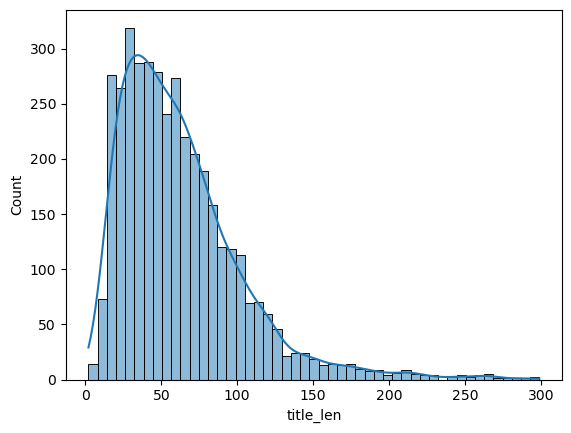

In [17]:
sns.histplot(data=df, x="title_len", kde=True);

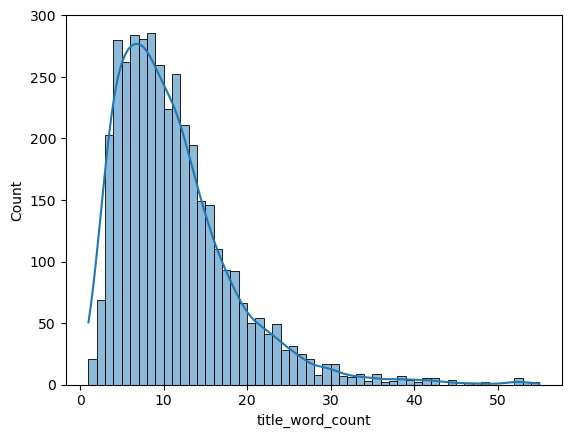

In [18]:
sns.histplot(data=df, x="title_word_count", kde=True);

In [19]:
df.describe(exclude=[object])  

,label,title_word_count,title_len,post_word_count,post_len
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,0.490779,11.070697,62.437244,44.424949,254.692111
std,0.499979,7.165345,40.521917,127.124875,755.843437
min,0.000000,1.000000,2.000000,0.000000,0.000000
25%,0.000000,6.000000,33.000000,0.000000,0.000000
50%,0.000000,10.000000,54.000000,0.000000,0.000000
75%,1.000000,14.000000,81.000000,37.000000,191.000000
max,1.000000,55.000000,299.000000,2400.000000,14044.000000


In [20]:
user_list = list(df['user'].unique())
len(df['user'].unique())

2750

In [48]:
# This is not good for viewing
user_behave_dict = {}
label_list = ['ns', 'ps']
for user in user_list:
    user_post_list = []
    counter = 0
    for idx, label in enumerate(label_list):
        df_temp = df.loc[(df['user']==user) & (df['label'] == idx)]
        post_num = len(df_temp)
        counter = counter+post_num
        user_post_list.append({label+'_post_num':post_num})
    user_post_list.append({'total_post_num':counter})
    user_behave_dict[user] = user_post_list

In [50]:
ns_post_list = []    
for user in user_list:
    df_temp = df.loc[(df['user']==user) & (df['label'] == 1)]
    post_num = df_temp.shape[0]
    ns_post_list.append(post_num)

In [51]:
ps_post_list = []    
for user in user_list:
    df_temp = df.loc[(df['user']==user) & (df['label'] == 0)]
    post_num = df_temp.shape[0]
    ps_post_list.append(post_num)

In [56]:
user_dict = {'user_name':user_list,
             'ns_posts':ns_post_list,
             'ps_posts':ps_post_list}
user_posts_df = pd.DataFrame(user_dict)
user_posts_df['total_posts'] = user_posts_df['ns_posts']+user_posts_df['ps_posts']

In [57]:
user_posts_df.head()

,user_name,ns_posts,ps_posts,total_posts
0,1338h4x,17,0,17
1,tale-wind,24,0,24
2,Focusboy50,1,0,1
3,Nas160,3,0,3
4,blubberpuppers,13,0,13


In [59]:
user_posts_df.loc[(user_posts_df['ps_posts'] != 0) & (user_posts_df['ns_posts'] != 0)]

,user_name,ns_posts,ps_posts,total_posts
120,MoonieSarito,2,1,3
284,Tail_sb,1,1,2
453,aperson7780,1,1,2
507,Frocharocha,42,1,43
561,ddudegames,1,1,2
593,MarineKingPrime_,1,1,2
596,Ragnara92,1,1,2
795,schuey_08,2,1,3
835,Filmfan345,1,1,2


## Prelim model

## Further EDA